In [1]:
############### ####################################################################################################################

#이 위로는 날릴것

############## ############ 시작 

# 코로나와 관련된 요인들의 상관관계 분석


## 목차

#### 1. 패키지 불러오기

#### 2. 데이터 불러오기 및 확인

#### 전체적인 그래프~
 

In [2]:
# 패키지 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib import font_manager, rc
from matplotlib import style

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [3]:
# 데이터 불러오기
df_SeoulFloating = pd.read_csv('dss/SeoulFloating.csv')
df_Policy = pd.read_csv('dss/Policy.csv')
df_PatientInfo = pd.read_csv('dss/PatientInfo.csv')
df_Region = pd.read_csv('dss/Region.csv')
df_SearchTrend = pd.read_csv('dss/SearchTrend.csv')
df_Time = pd.read_csv('dss/Time.csv')
df_TimeAge = pd.read_csv('dss/TimeAge.csv')
df_TimeGender = pd.read_csv('dss/TimeGender.csv')
df_TimeProvince = pd.read_csv('dss/TimeProvince.csv')
df_Weather = pd.read_csv('dss/Weather.csv')
df_Case = pd.read_csv('dss/Case.csv')
df_PatientRoute = pd.read_csv('dss/PatientRoute.csv')

In [4]:
# 환자정보
df_PatientInfo.tail(5)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3325,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [5]:
df_PatientInfo['state'].unique()

array(['released', 'isolated', 'deceased'], dtype=object)

In [6]:
# df_PatientInfo 의 컬럼 정보
df_PatientInfo.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

In [7]:
# 데이터 결측치 확인

df_PatientInfo.isnull().sum()

patient_id               0
global_num            1089
sex                     66
birth_year             437
age                     74
country                  0
province                 0
city                    79
disease               3308
infection_case         767
infection_order       3295
infected_by           2520
contact_number        2712
symptom_onset_date    2855
confirmed_date           3
released_date         2108
deceased_date         3266
state                    0
dtype: int64

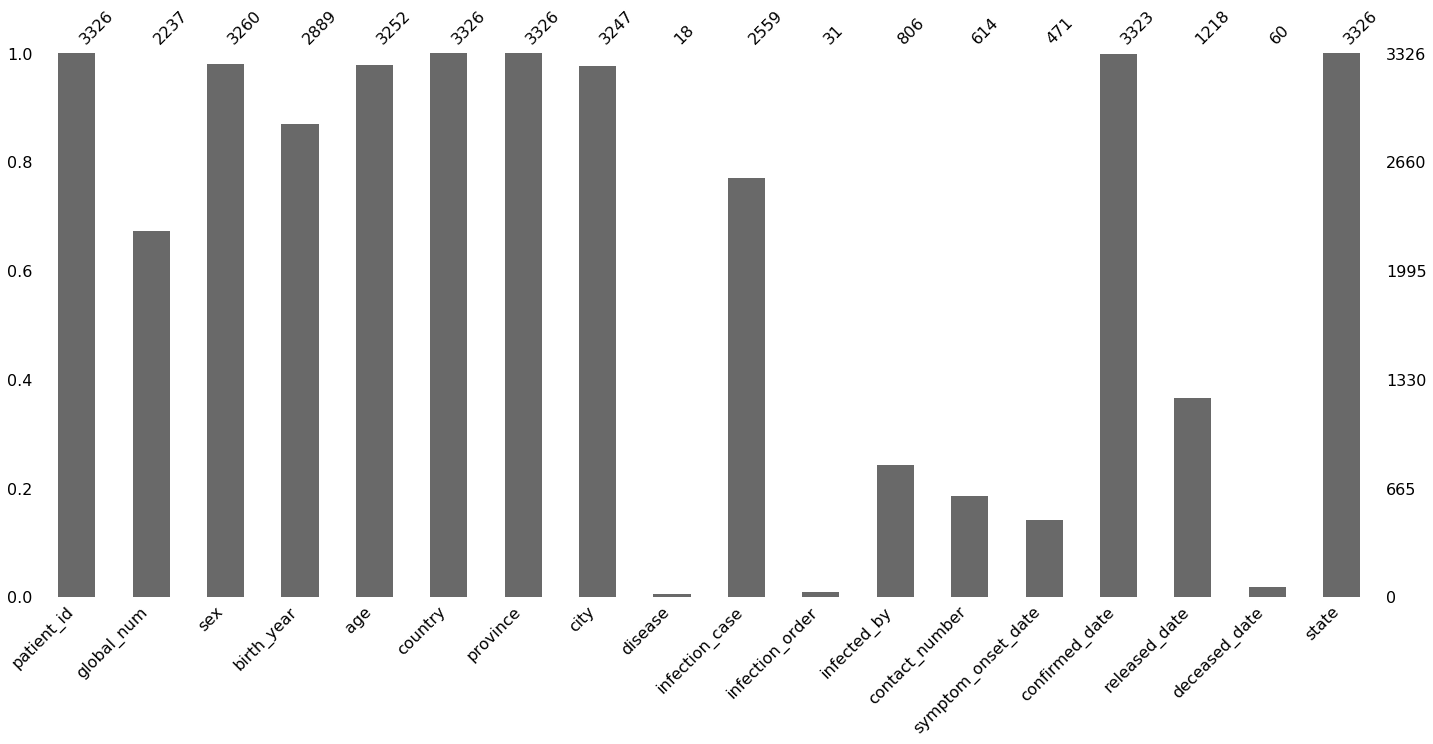

In [8]:
msno.bar(df_PatientInfo)

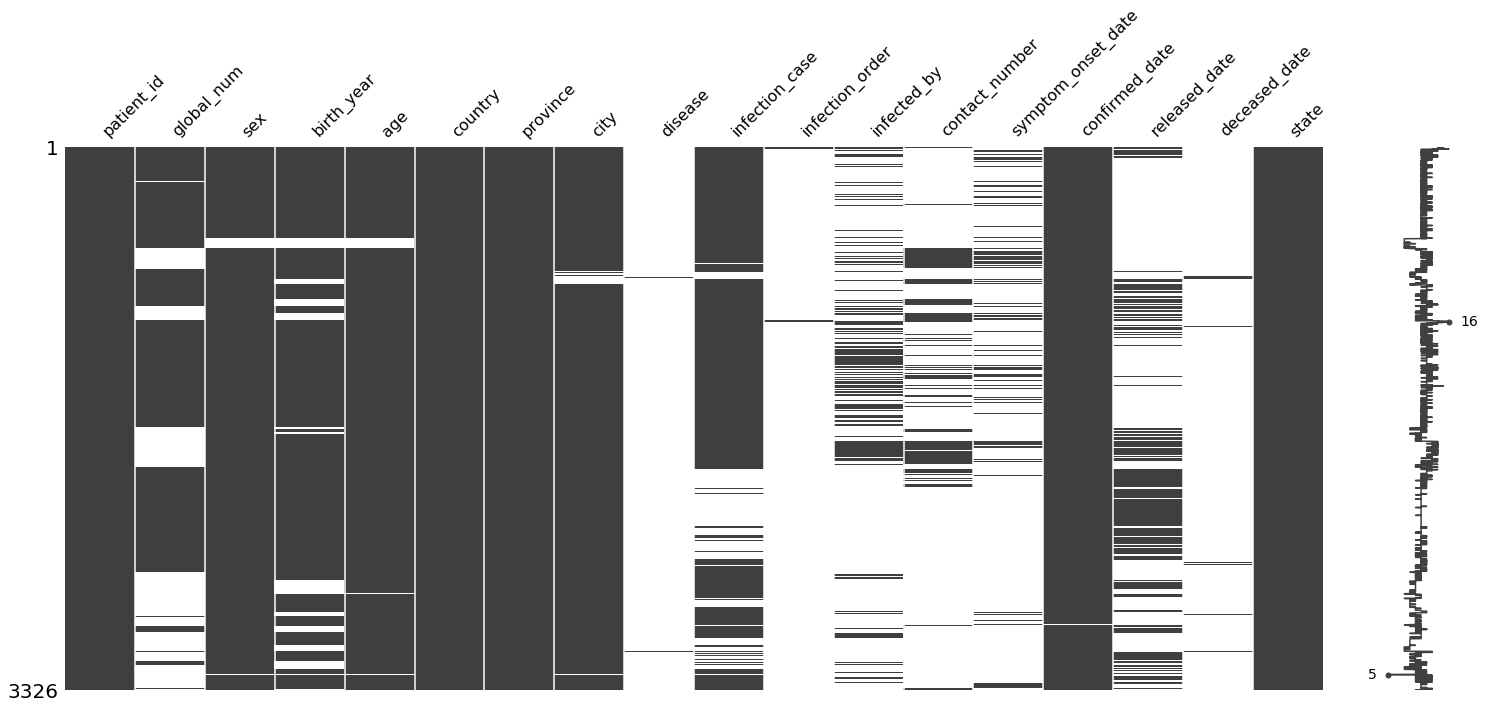

In [9]:
msno.matrix(df_PatientInfo)

In [10]:
# 데이터 타입 확인

df_PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 18 columns):
patient_id            3326 non-null int64
global_num            2237 non-null float64
sex                   3260 non-null object
birth_year            2889 non-null float64
age                   3252 non-null object
country               3326 non-null object
province              3326 non-null object
city                  3247 non-null object
disease               18 non-null object
infection_case        2559 non-null object
infection_order       31 non-null float64
infected_by           806 non-null float64
contact_number        614 non-null float64
symptom_onset_date    471 non-null object
confirmed_date        3323 non-null object
released_date         1218 non-null object
deceased_date         60 non-null object
state                 3326 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 467.8+ KB


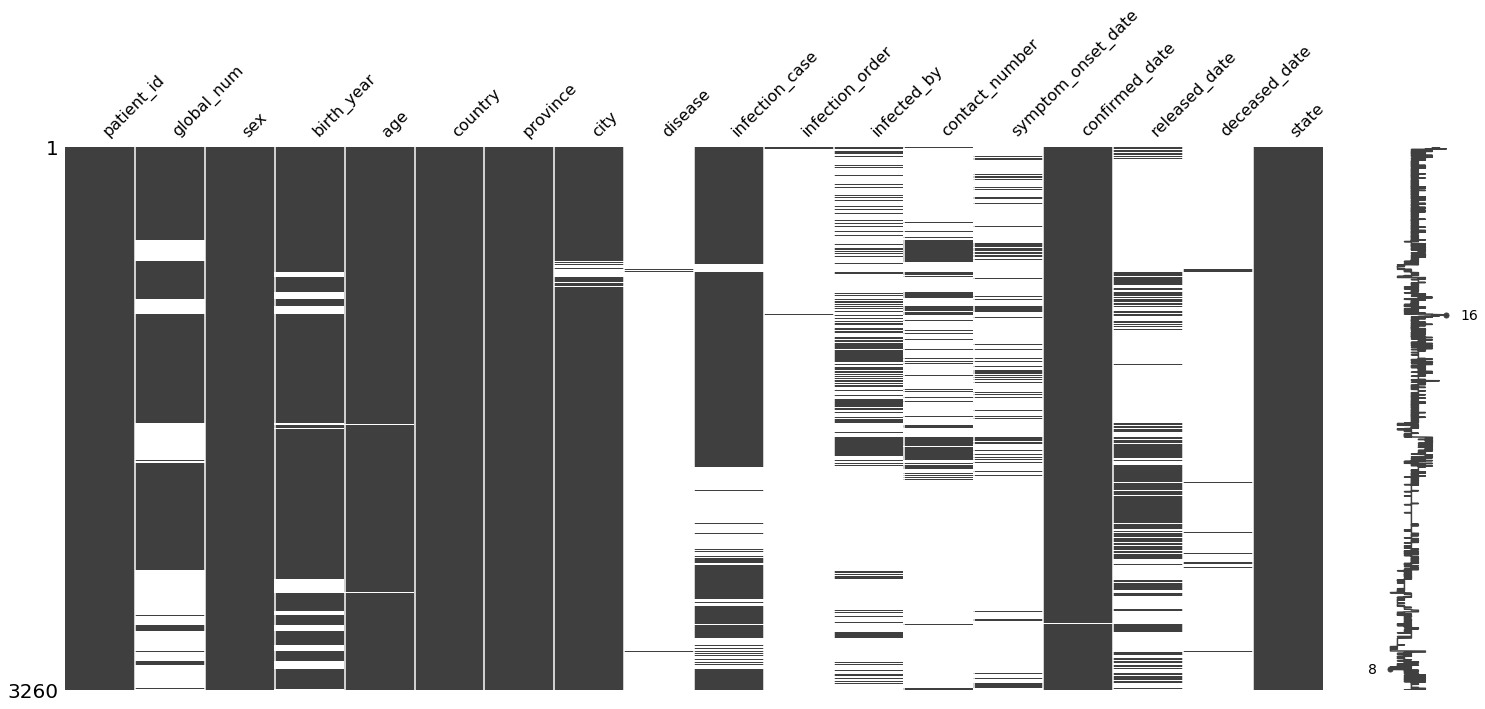

In [11]:
#성별이 누락된 데이터를 지우겠습니다.
df_PatientInfo.dropna(subset=['sex'], inplace=True)
msno.matrix(df_PatientInfo)

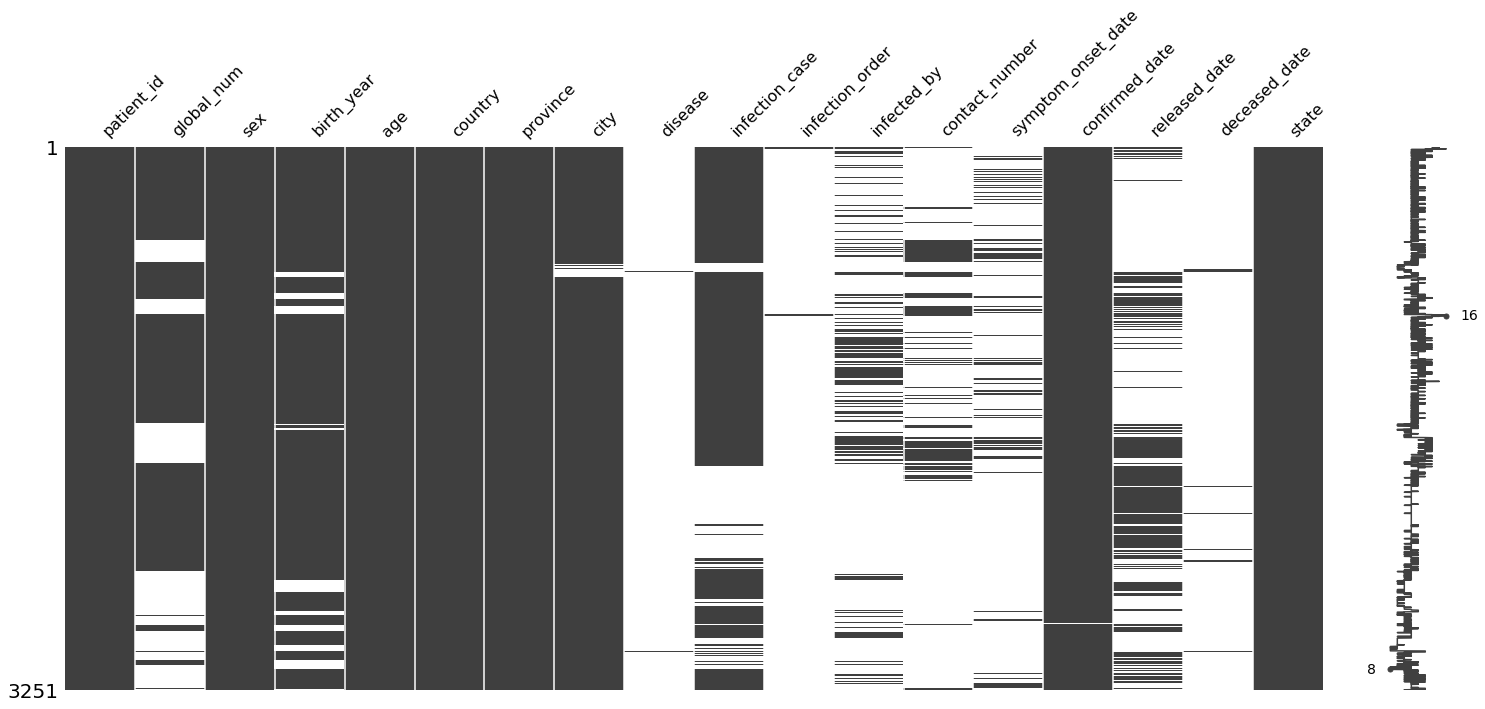

In [12]:
# 나이가 누락된 데이터도 지우도록 하겠습니다
df_PatientInfo.dropna(subset=['age'], inplace=True)
msno.matrix(df_PatientInfo)

In [13]:
# 3326개의 로우데이터에서 3251개로 감소하였습니다.

In [14]:
df_Time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
87,2020-04-16,0,538775,513894,10613,7757,229
88,2020-04-17,0,546463,521642,10635,7829,230
89,2020-04-18,0,554834,530631,10653,7937,232
90,2020-04-19,0,559109,536205,10661,8042,234


In [15]:
(df_PatientInfo['sex']=='male').value_counts()

False    1826
True     1425
Name: sex, dtype: int64

In [16]:
df_Policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious disease alert level,level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious disease alert level,level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious disease alert level,level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious disease alert level,level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


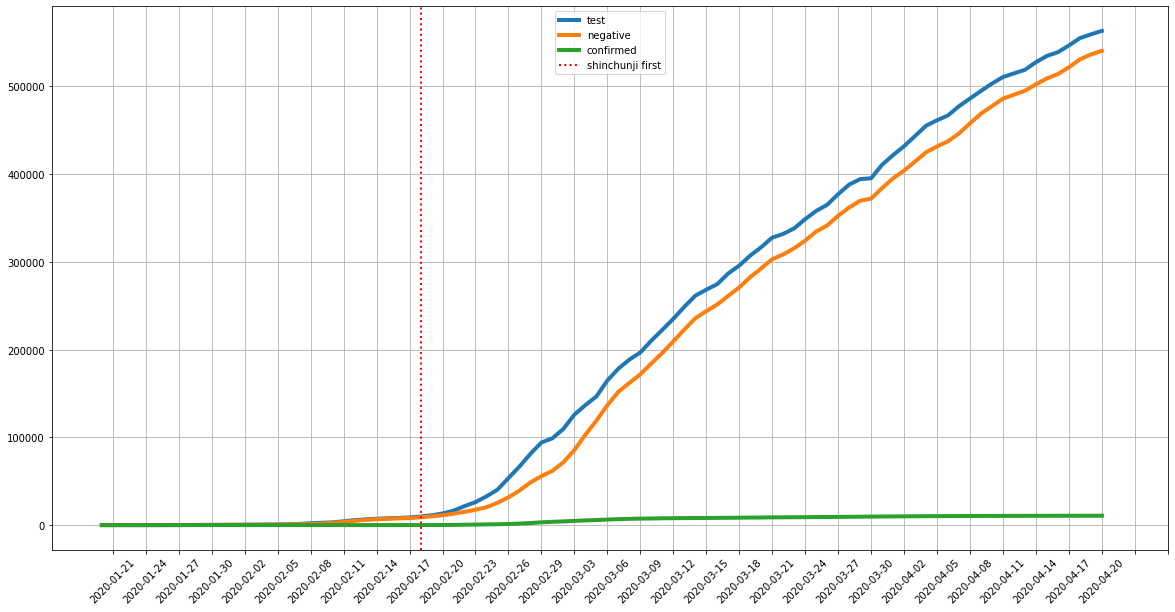

In [17]:
# 시간에 따른 검사횟수와 음성 양성 판정수

plt.figure(figsize=(20, 10))

plt.plot(df_Time.date, df_Time.test,
         linewidth=4, label='test')

plt.plot(df_Time.date, df_Time.negative,
         linewidth=4, label='negative')

plt.plot(df_Time.date, df_Time.confirmed,
         linewidth=4, label='confirmed')
plt.xticks(np.arange(1, 99, 3), rotation=45)

plt.axvline(x='2020-02-18', ls=':', c='r',
            linewidth=2, label='shinchunji first')
plt.legend(loc=9)
plt.grid()

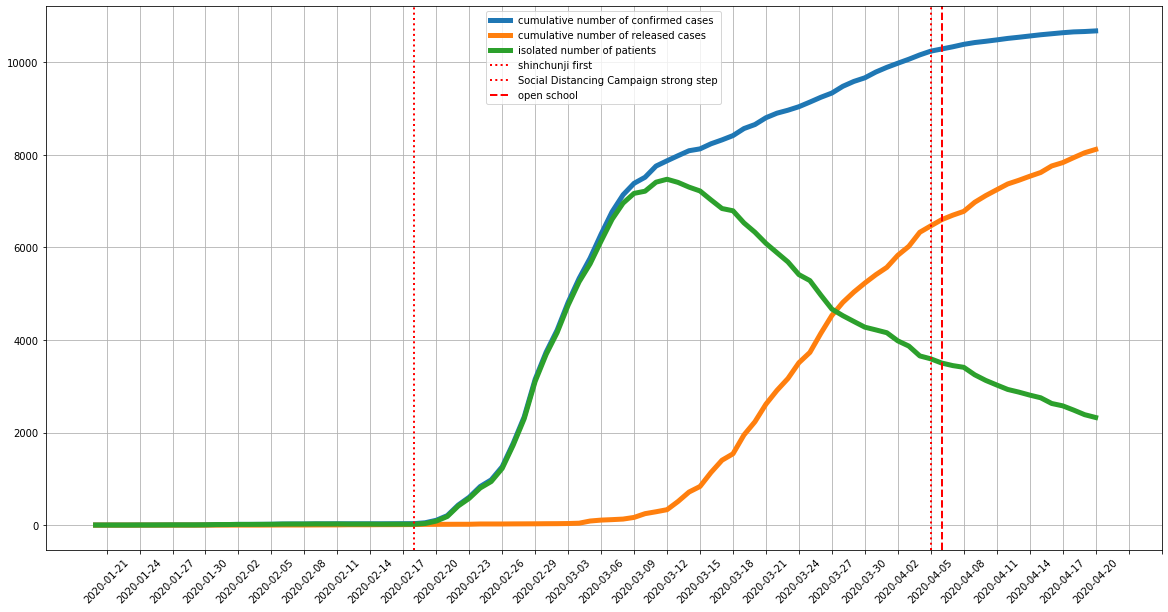

In [18]:
# https://techreviewtips.blogspot.com/2017/10/04-02.html

plt.figure(figsize=(20, 10))


plt.plot(df_Time.date, df_Time.confirmed,
         linewidth=5, label='cumulative number of confirmed cases')

plt.plot(df_Time.date, df_Time.released,
         linewidth=5, label='cumulative number of released cases')

# 사망자는 상대적으로 적으므로 이 차트에서 빼겠음
# plt.plot(df_Time.date, df_Time.deceased,
#         linewidth=5, label='cumulative number of deceased cases')

plt.plot(df_Time.date, df_Time.confirmed - df_Time.released - df_Time.deceased,
         linewidth=5, label='isolated number of patients')


plt.xticks(np.arange(1, 99, 3), rotation=45)


plt.axvline(x='2020-02-18', ls=':', c='r',
            linewidth=2, label='shinchunji first')
plt.axvline(x='2020-04-05', ls=":", c="r", linewidth=2,
            label='Social Distancing Campaign strong step')
plt.axvline(x='2020-04-06', ls='--', c="r",
            linewidth=2, label='open school')


plt.legend(loc=9)
plt.grid()

In [19]:
#위에 차트에서 x축 기울여서 표현하기

In [20]:
df_TimeGender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
95,2020-04-18,0,female,6360,108
96,2020-04-19,0,male,4297,124
97,2020-04-19,0,female,6364,110
98,2020-04-20,0,male,4302,125


In [21]:
# 성별 확진자수 알아보기
# 마지막 날짜를 기준으로 알아보겠습니다
df_TimeGender_last=df_TimeGender.iloc[-2:]
df_TimeGender_last

,date,time,sex,confirmed,deceased
98,2020-04-20,0,male,4302,125
99,2020-04-20,0,female,6372,111


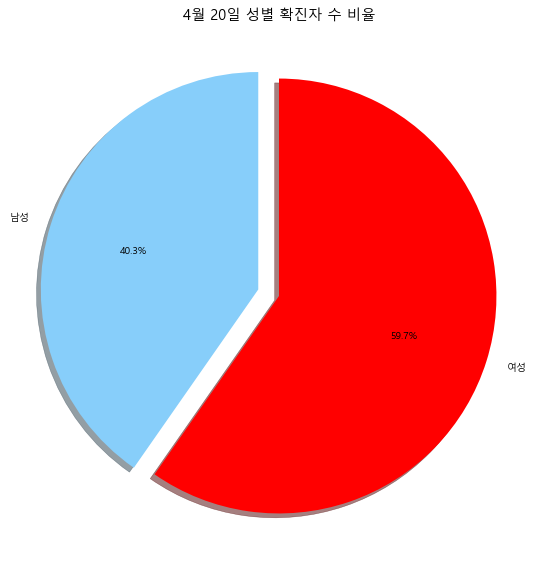

전체 확진자 수 중 여성은 6372 명이고 남성은 4302 명 입니다.

확진자수는 여성이 남성에 비해 약 1.48배 정도 높은 비율로 나타났습니다.


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [int(df_TimeGender_last.iloc[0, 3])/df_TimeGender_last['confirmed'].sum(),
         int(df_TimeGender_last.iloc[1, 3])/df_TimeGender_last['confirmed'].sum()]
explode = (0.1, 0.0)
plt.title('4월 20일 성별 확진자 수 비율')
plt.pie(ratio, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
print('전체 확진자 수 중 여성은 {} 명이고 남성은 {} 명 입니다.\n'.format(
    df_TimeGender_last.iloc[1, 3], df_TimeGender_last.iloc[0, 3]))

lulu = round((int(df_TimeGender_last.iloc[1, 3])/df_TimeGender_last['confirmed'].sum())/(
    int(df_TimeGender_last.iloc[0, 3])/df_TimeGender_last['confirmed'].sum()), 2)
print('확진자수는 여성이 남성에 비해 약 {}배 정도 높은 비율로 나타났습니다.'.format(lulu))

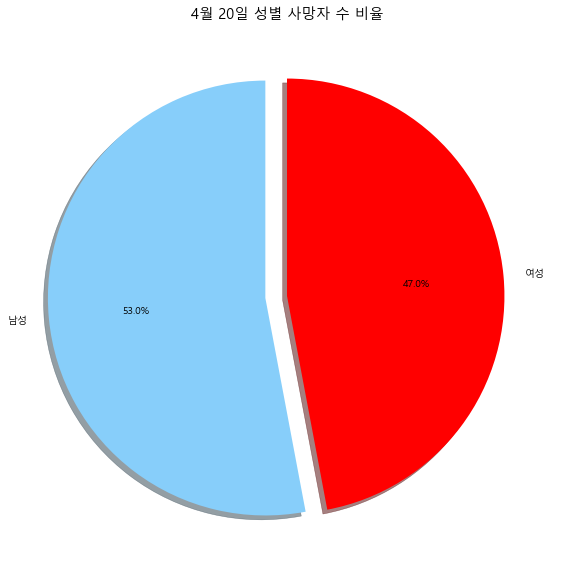

전체 사망자 수 중 여성은 111 명이고 남성은 125 명 입니다.


In [23]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20,10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [int(df_TimeGender_last.iloc[0,4])/df_TimeGender_last['deceased'].sum(),
         int(df_TimeGender_last.iloc[1,4])/df_TimeGender_last['deceased'].sum() ]
explode = (0.1, 0.0 )
plt.title('4월 20일 성별 사망자 수 비율')
plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
print('전체 사망자 수 중 여성은 {} 명이고 남성은 {} 명 입니다.'.format(df_TimeGender_last.iloc[1,4],df_TimeGender_last.iloc[0,4]))

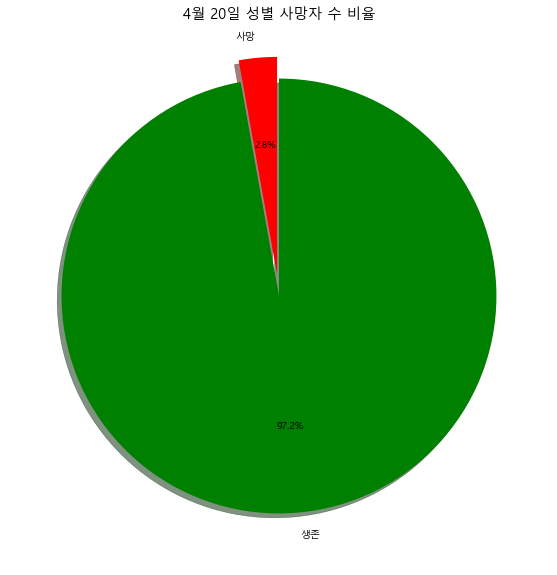

In [184]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20,10))
colors = ['red', 'green']
labels = ['사망', '생존']
ratio = [int(df_TimeGender_last.iloc[0,4])/(int(df_TimeGender_last.iloc[0,4])+int(df_TimeGender_last.iloc[0,3])),
         int(df_TimeGender_last.iloc[0,3])/(int(df_TimeGender_last.iloc[0,4])+int(df_TimeGender_last.iloc[0,3]))]
explode = (0.1, 0.0 )
plt.title('4월 20일 남성 확진자 수 대비 사망자 비율')
plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

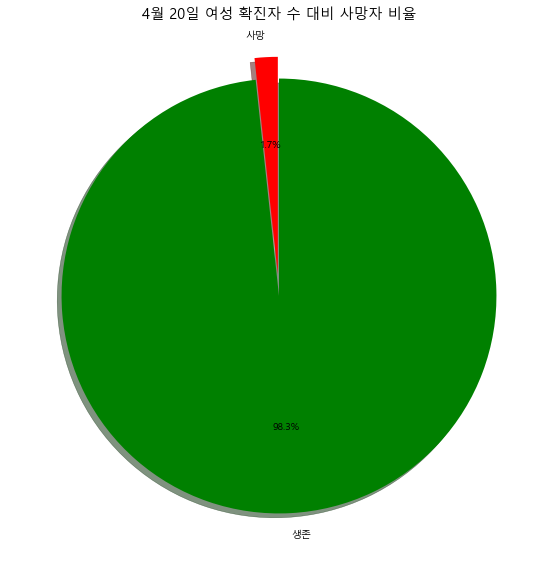

In [186]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20,10))
colors = ['red', 'green']
labels = ['사망', '생존']
ratio = [int(df_TimeGender_last.iloc[1,4])/(int(df_TimeGender_last.iloc[1,4])+int(df_TimeGender_last.iloc[1,3])),
         int(df_TimeGender_last.iloc[1,3])/(int(df_TimeGender_last.iloc[1,4])+int(df_TimeGender_last.iloc[1,3]))]
explode = (0.1, 0.0 )
plt.title('4월 20일 여성 확진자 수 대비 사망자 비율')
plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [24]:
# 확진자 수는 여성이 더 많은데 사망률은 남성이 높은 이유?

# https://docs.google.com/spreadsheets/d/e/2PACX-1vQU0SIALScXx8VXDX7yKNKWWPKE1YjFlWc6VTEVSN45CklWWf-uWmprQIyLtoPDA18tX9cFDr-aQ9S6/pubhtml

#우리나라에선 데이터가 적기때문에 해외 데이터로 확장

df_global = pd.read_csv('dss/COVID19_line_list_data.csv')
df_global.tail(5)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN
1084,1085,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Switzerland:...,Bern,Switzerland,male,70.0,2/17/2020,...,0,NaN,Reuters,https://www.reuters.com/article/uk-switzerland...,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
# 해외데이터 상위 5개국 
df_global['country'].value_counts().head(5)

China          197
Japan          190
South Korea    114
Hong Kong       94
Singapore       93
Name: country, dtype: int64

In [210]:
df_global1_male = df_global['gender'] == 'male'
df_global1_female = df_global['gender'] == 'female'

df_male2 = df_global[df_global1_male]
df_female2 = df_global[df_global1_female]

df_male2.columns

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [211]:
x1=int(df_male2['gender'].value_counts())
x2=int(df_female2['gender'].value_counts())
x3=int(df_male2['gender'].value_counts())+int(df_female2['gender'].value_counts())

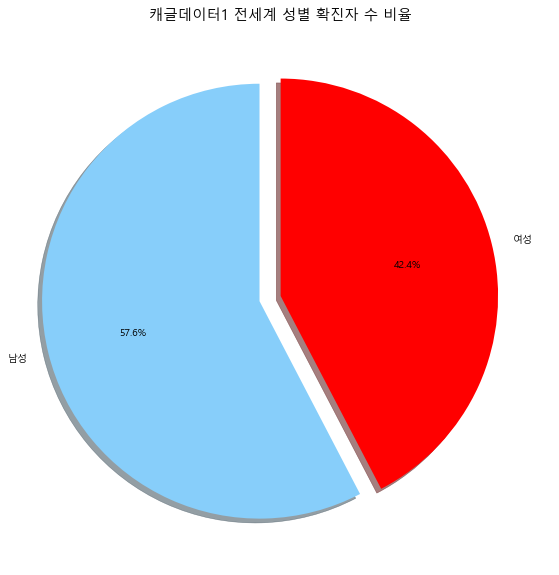

In [212]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20,10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [x1/x3,
         x2/x3 ]
explode = (0.1, 0.0 )
plt.title('캐글데이터1 전세계 성별 확진자 수 비율')
plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

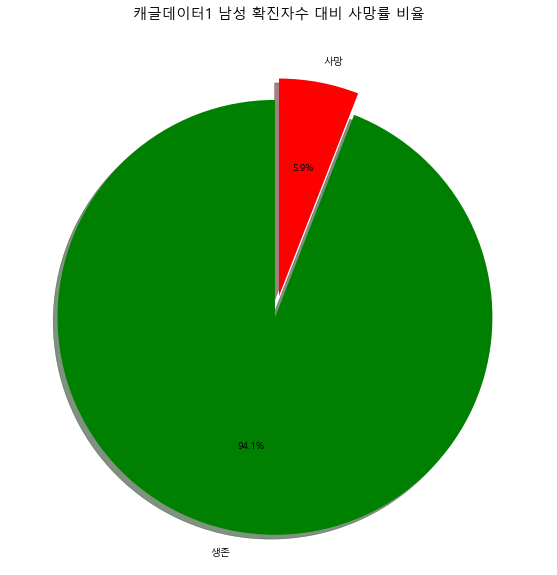

In [215]:
#남성 사망률
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20,10))
colors = ['green', 'red']
labels = ['생존', '사망']
ratio = [df_male2['death'].value_counts()[0]/df_male2['death'].value_counts()[0],
         df_male2['death'].value_counts()[1]/df_male2['death'].value_counts()[0]]
explode = (0.1, 0.0 )
plt.title('캐글데이터1 남성 확진자수 대비 사망률 비율')
plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

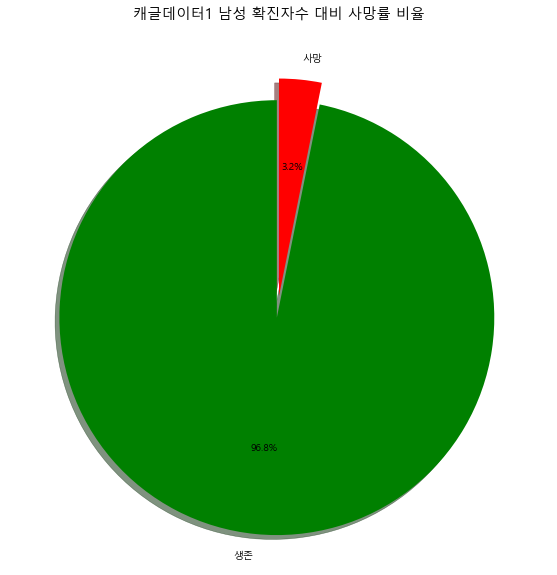

In [216]:
#여성 사망률
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20,10))
colors = ['green', 'red']
labels = ['생존', '사망']
ratio = [df_female2['death'].value_counts()[0]/df_female2['death'].value_counts()[0],
         df_female2['death'].value_counts()[1]/df_female2['death'].value_counts()[0]]
explode = (0.1, 0.0 )
plt.title('캐글데이터1 남성 확진자수 대비 사망률 비율')
plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [217]:
# 해외 데이터에서도 남성의 사망률이 훨씬 높게 나타났다.
# 남성이 사망률이 더 높은 이유는 무엇일까
# 1. 유전적 요인 2. 환경적 요인

#http://kosis.kr/

In [227]:
# 흡연 데이터 
smoke = pd.read_csv('dss/smoke_20200504180722.csv', encoding='euc-kr')
smoke

,국가별,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1
0,국가별,남자,여자,남자,여자,남자,여자,남자,여자
1,아시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,한국,-,-,39.1,3.1,-,-,37.7,3.5
3,중국,47.6,1.8,-,-,-,-,-,-
4,인도,20.4,1.9,-,-,-,-,-,-
5,인도네시아,76.2,3.6,-,-,-,-,-,-
6,이스라엘,-,-,25.3,14.1,21.3,12.8,-,-
7,일본,30.1,7.9,30.2,8.2,29.4,7.2,-,-
8,터키,-,-,40.1,13.3,-,-,-,-
9,북아메리카,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
smoke1 = smoke.iloc[2:9,:]
smoke1

,국가별,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1
2,한국,-,-,39.1,3.1,-,-,37.7,3.5
3,중국,47.6,1.8,-,-,-,-,-,-
4,인도,20.4,1.9,-,-,-,-,-,-
5,인도네시아,76.2,3.6,-,-,-,-,-,-
6,이스라엘,-,-,25.3,14.1,21.3,12.8,-,-
7,일본,30.1,7.9,30.2,8.2,29.4,7.2,-,-
8,터키,-,-,40.1,13.3,-,-,-,-


In [66]:
# 사망자들의 연령대를 알아보자

In [27]:
df_TimeAge0420 = df_TimeAge[-9:]
df_TimeAge0420

,date,time,age,confirmed,deceased
441,2020-04-20,0,0s,138,0
442,2020-04-20,0,10s,581,0
443,2020-04-20,0,20s,2926,0
444,2020-04-20,0,30s,1139,2
445,2020-04-20,0,40s,1412,3
446,2020-04-20,0,50s,1948,15
447,2020-04-20,0,60s,1343,34
448,2020-04-20,0,70s,705,69
449,2020-04-20,0,80s,482,113


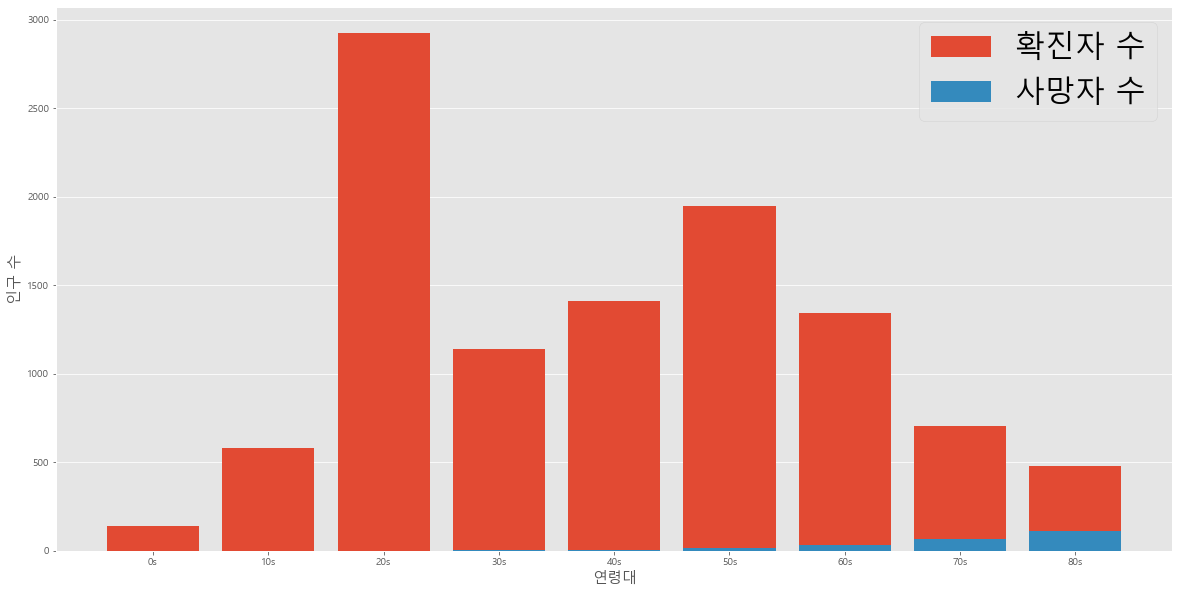

In [28]:
plt.figure(figsize=(20,10))

p1=plt.bar(data=df_TimeAge0420,x='age',height='confirmed')
p2=plt.bar(data=df_TimeAge0420,x='age',height='deceased')
plt.xlabel('연령대',fontsize=15)
plt.ylabel('인구 수',fontsize=15)
plt.grid(axis='x')

plt.legend((p1,p2),('확진자 수','사망자 수'),fontsize=30)
plt.show()


In [29]:
# 연령대가 높을수록 사망률이 증가합니다.


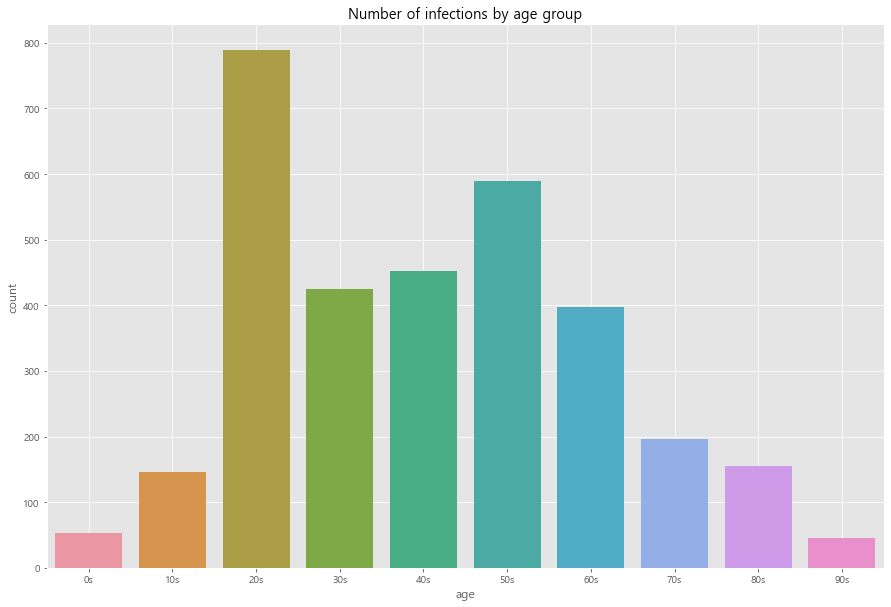

In [30]:
df_PatientInfo = df_PatientInfo.drop(
    df_PatientInfo[df_PatientInfo['age'] == '100s'].index)
plt.figure(figsize=(15, 10))
sns.countplot(x="age", data=df_PatientInfo.sort_values(by=['age']))
plt.title('Number of infections by age group')
plt.grid(axis='x')
plt.show()

In [31]:
# 20대에서 가장 높은 확진자수를 나타냈고 그다음은 50대에서 나타났습니다.

In [32]:
#https://techreviewtips.blogspot.com/2017/10/04-02.html
    
# plt.figure(figsize=(20, 10))


# plt.plot(df_PatientInfo.confirmed_date, df_PatientInfo.age.value_counts(),
#          linewidth=5, label='cumulative number of confirmed cases')

# plt.legend(loc=9)
# plt.grid()

In [33]:
df_Time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
87,2020-04-16,0,538775,513894,10613,7757,229
88,2020-04-17,0,546463,521642,10635,7829,230
89,2020-04-18,0,554834,530631,10653,7937,232
90,2020-04-19,0,559109,536205,10661,8042,234


In [34]:
df_PatientInfo

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [35]:
df_PatientInfo['country']

0       Korea
1       Korea
2       Korea
3       Korea
4       Korea
        ...  
3321    Korea
3322    Korea
3323    Korea
3324    Korea
3325    China
Name: country, Length: 3250, dtype: object

In [36]:
df_PI = df_PatientInfo[['patient_id','age','confirmed_date']].sort_values(by='confirmed_date')
df_PI

,patient_id,age,confirmed_date
846,1400000001,30s,2020-01-20
0,1000000001,50s,2020-01-23
1065,2000000001,50s,2020-01-26
1066,2000000002,50s,2020-01-27
3,1000000004,20s,2020-01-30
...,...,...,...
1719,2000000655,20s,2020-04-19
937,1400000092,20s,2020-04-19
2923,6011000051,40s,NaN
2924,6011000052,0s,NaN


In [37]:
df_PI.dropna(subset=['confirmed_date'],inplace=True)
df_PI

,patient_id,age,confirmed_date
846,1400000001,30s,2020-01-20
0,1000000001,50s,2020-01-23
1065,2000000001,50s,2020-01-26
1066,2000000002,50s,2020-01-27
3,1000000004,20s,2020-01-30
...,...,...,...
752,1100000129,20s,2020-04-18
751,1100000128,50s,2020-04-18
1720,2000000656,50s,2020-04-19
1719,2000000655,20s,2020-04-19


In [38]:
df_PI['10s'] = 0
df_PI['20s'] = 0
df_PI['30s'] = 0
df_PI['40s'] = 0
df_PI['50s'] = 0
df_PI['60s'] = 0
df_PI['70s'] = 0
df_PI['80s'] = 0
df_PI['90s'] = 0

# for i in range(len(df_PI)):
#     if '10' in df_PI['age']:
#         df_PI['10s'] += 1
#     elif '20s' in df_PI['age']:
#         df_PI['20s'] += 1
#     elif '30s' in df_PI['age']:
#         df_PI['30s'] += 1
#     elif '40s' in df_PI['age']:
#         df_PI['40s'] += 1
#     elif '50s' in df_PI['age']:
#         df_PI['50s'] += 1
#     elif '60s' in df_PI['age']:
#         df_PI['60s'] += 1
#     elif '70s' in df_PI['age']:
#         df_PI['70s'] += 1
#     elif '80s' in df_PI['age']:
#         df_PI['80s'] += 1
#     elif '90s' in df_PI['age']:
#         df_PI['90s'] += 1

In [39]:
df_PI['number'] = range(1,len(df_PI)+1)

In [40]:
df_PI

,patient_id,age,confirmed_date,10s,20s,30s,40s,50s,60s,70s,80s,90s,number
846,1400000001,30s,2020-01-20,0,0,0,0,0,0,0,0,0,1
0,1000000001,50s,2020-01-23,0,0,0,0,0,0,0,0,0,2
1065,2000000001,50s,2020-01-26,0,0,0,0,0,0,0,0,0,3
1066,2000000002,50s,2020-01-27,0,0,0,0,0,0,0,0,0,4
3,1000000004,20s,2020-01-30,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1100000129,20s,2020-04-18,0,0,0,0,0,0,0,0,0,3243
751,1100000128,50s,2020-04-18,0,0,0,0,0,0,0,0,0,3244
1720,2000000656,50s,2020-04-19,0,0,0,0,0,0,0,0,0,3245
1719,2000000655,20s,2020-04-19,0,0,0,0,0,0,0,0,0,3246


In [41]:
df_PI['0s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
                                    '0s'] if '0s' in df_PI.age.iloc[: x].value_counts() else 0)
df_PI['10s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
    '10s'] if '10s' in df_PI.age.iloc[: x].value_counts() else 0)
df_PI['20s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
    '20s'] if '20s' in df_PI.age.iloc[: x].value_counts() else 0)
df_PI['30s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
    '30s'] if '30s' in df_PI.age.iloc[: x].value_counts() else 0)
df_PI['40s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
    '40s'] if '40s' in df_PI.age.iloc[: x].value_counts() else 0)
df_PI['50s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
    '50s'] if '50s' in df_PI.age.iloc[: x].value_counts() else 0)
df_PI['60s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
    '60s'] if '60s' in df_PI.age.iloc[: x].value_counts() else 0)
df_PI['70s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
    '70s'] if '70s' in df_PI.age.iloc[: x].value_counts() else 0)
df_PI['80s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
    '80s'] if '80s' in df_PI.age.iloc[: x].value_counts() else 0)
df_PI['90s'] = df_PI['number'].apply(lambda x: df_PI.age.iloc[: x].value_counts()[
    '80s'] if '80s' in df_PI.age.iloc[: x].value_counts() else 0)

In [42]:
df_PI

,patient_id,age,confirmed_date,10s,20s,30s,40s,50s,60s,70s,80s,90s,number,0s
846,1400000001,30s,2020-01-20,0,0,1,0,0,0,0,0,0,1,0
0,1000000001,50s,2020-01-23,0,0,1,0,1,0,0,0,0,2,0
1065,2000000001,50s,2020-01-26,0,0,1,0,2,0,0,0,0,3,0
1066,2000000002,50s,2020-01-27,0,0,1,0,3,0,0,0,0,4,0
3,1000000004,20s,2020-01-30,0,1,1,0,3,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1100000129,20s,2020-04-18,145,787,425,452,587,398,197,155,155,3243,52
751,1100000128,50s,2020-04-18,145,787,425,452,588,398,197,155,155,3244,52
1720,2000000656,50s,2020-04-19,145,787,425,452,589,398,197,155,155,3245,52
1719,2000000655,20s,2020-04-19,145,788,425,452,589,398,197,155,155,3246,52


In [43]:
df_PI.set_index('confirmed_date')

,patient_id,age,10s,20s,30s,40s,50s,60s,70s,80s,90s,number,0s
confirmed_date,,,,,,,,,,,,,
2020-01-20,1400000001,30s,0,0,1,0,0,0,0,0,0,1,0
2020-01-23,1000000001,50s,0,0,1,0,1,0,0,0,0,2,0
2020-01-26,2000000001,50s,0,0,1,0,2,0,0,0,0,3,0
2020-01-27,2000000002,50s,0,0,1,0,3,0,0,0,0,4,0
2020-01-30,1000000004,20s,0,1,1,0,3,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-18,1100000129,20s,145,787,425,452,587,398,197,155,155,3243,52
2020-04-18,1100000128,50s,145,787,425,452,588,398,197,155,155,3244,52
2020-04-19,2000000656,50s,145,787,425,452,589,398,197,155,155,3245,52


<Figure size 432x288 with 0 Axes>

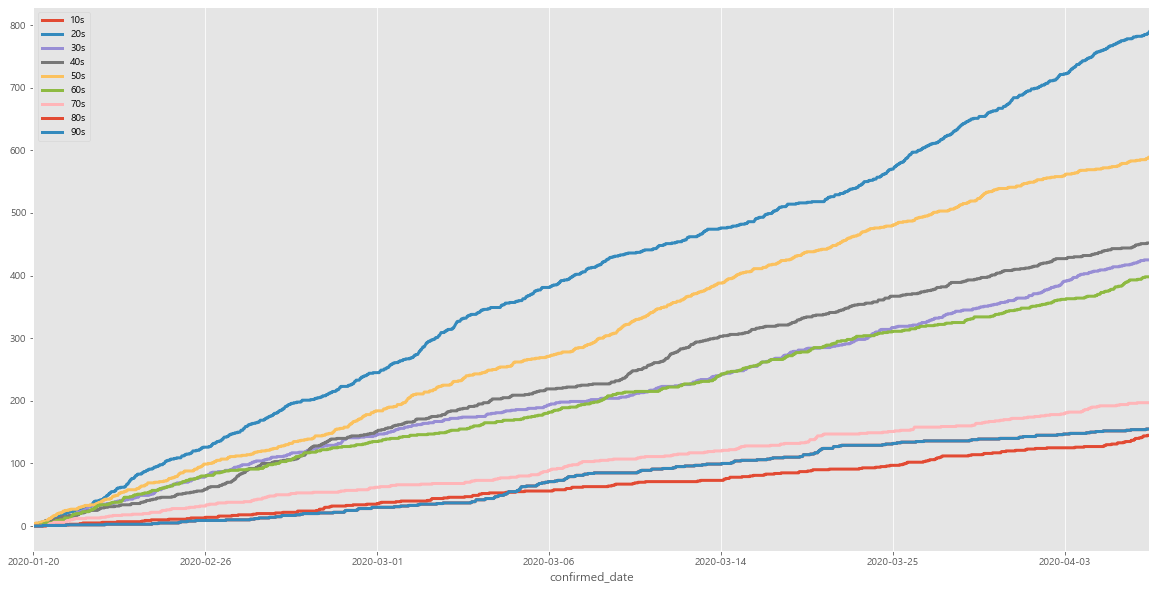

In [44]:
# 날짜별 연령대로 나눈 누적 확진자 수 
plt.figure()
df_PI.plot(kind='line', y=['10s', '20s', '30s', '40s',
                           '50s', '60s', '70s', '80s', '90s'],
           x='confirmed_date', figsize=(20, 10),linewidth=3)
plt.grid(axis='y')
plt.show()

In [45]:
df_Region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


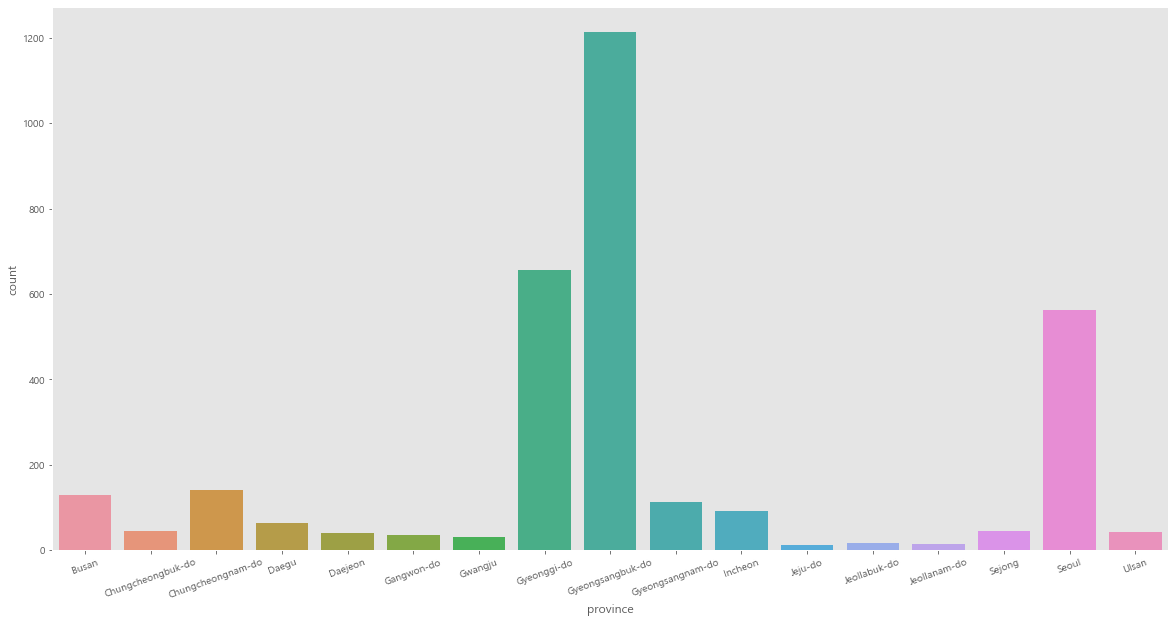

In [46]:
plt.figure(figsize=(20, 10))
sns.countplot(x='province', data=df_PatientInfo.sort_values(
    by=['province']))
plt.xticks(rotation=20)
plt.grid(axis='y')

In [47]:
#많은 순서대로 정리를 할까말까

df_PatientInfo['province'].value_counts(ascending=False)

Gyeongsangbuk-do     1213
Gyeonggi-do           656
Seoul                 563
Chungcheongnam-do     141
Busan                 129
Gyeongsangnam-do      112
Incheon                92
Daegu                  63
Sejong                 46
Chungcheongbuk-do      44
Ulsan                  42
Daejeon                39
Gangwon-do             35
Gwangju                30
Jeollabuk-do           17
Jeollanam-do           15
Jeju-do                13
Name: province, dtype: int64

([<matplotlib.patches.Wedge at 0x141d73e1b88>,
 [Text(0.38380080769241587, 1.0308719319171755, ''),
  Text(-1.098271703387495, 0.061638182471016136, ''),
  Text(-0.43490104452525186, -1.0103767027553856, ''),
  Text(0.3233286765739087, -1.051407897490296, ''),
  Text(0.5923448562952423, -0.9268913481204628, ''),
  Text(0.9968610346820246, -0.4650463176208188, '')])

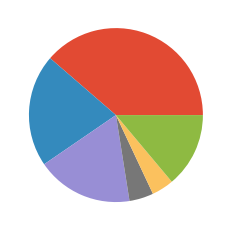

In [48]:
# plt.pie(df_PatientInfo['province'].value_counts())
# 상위 지역도시 5개 + 그외 지역(etc) 파이차트
# name + % 추가할것
city0 = df_PatientInfo['province'].value_counts()
city_top5 = city0[:5]
city_top5['etc'] = city0[6:].sum()

plt.pie(city_top5)

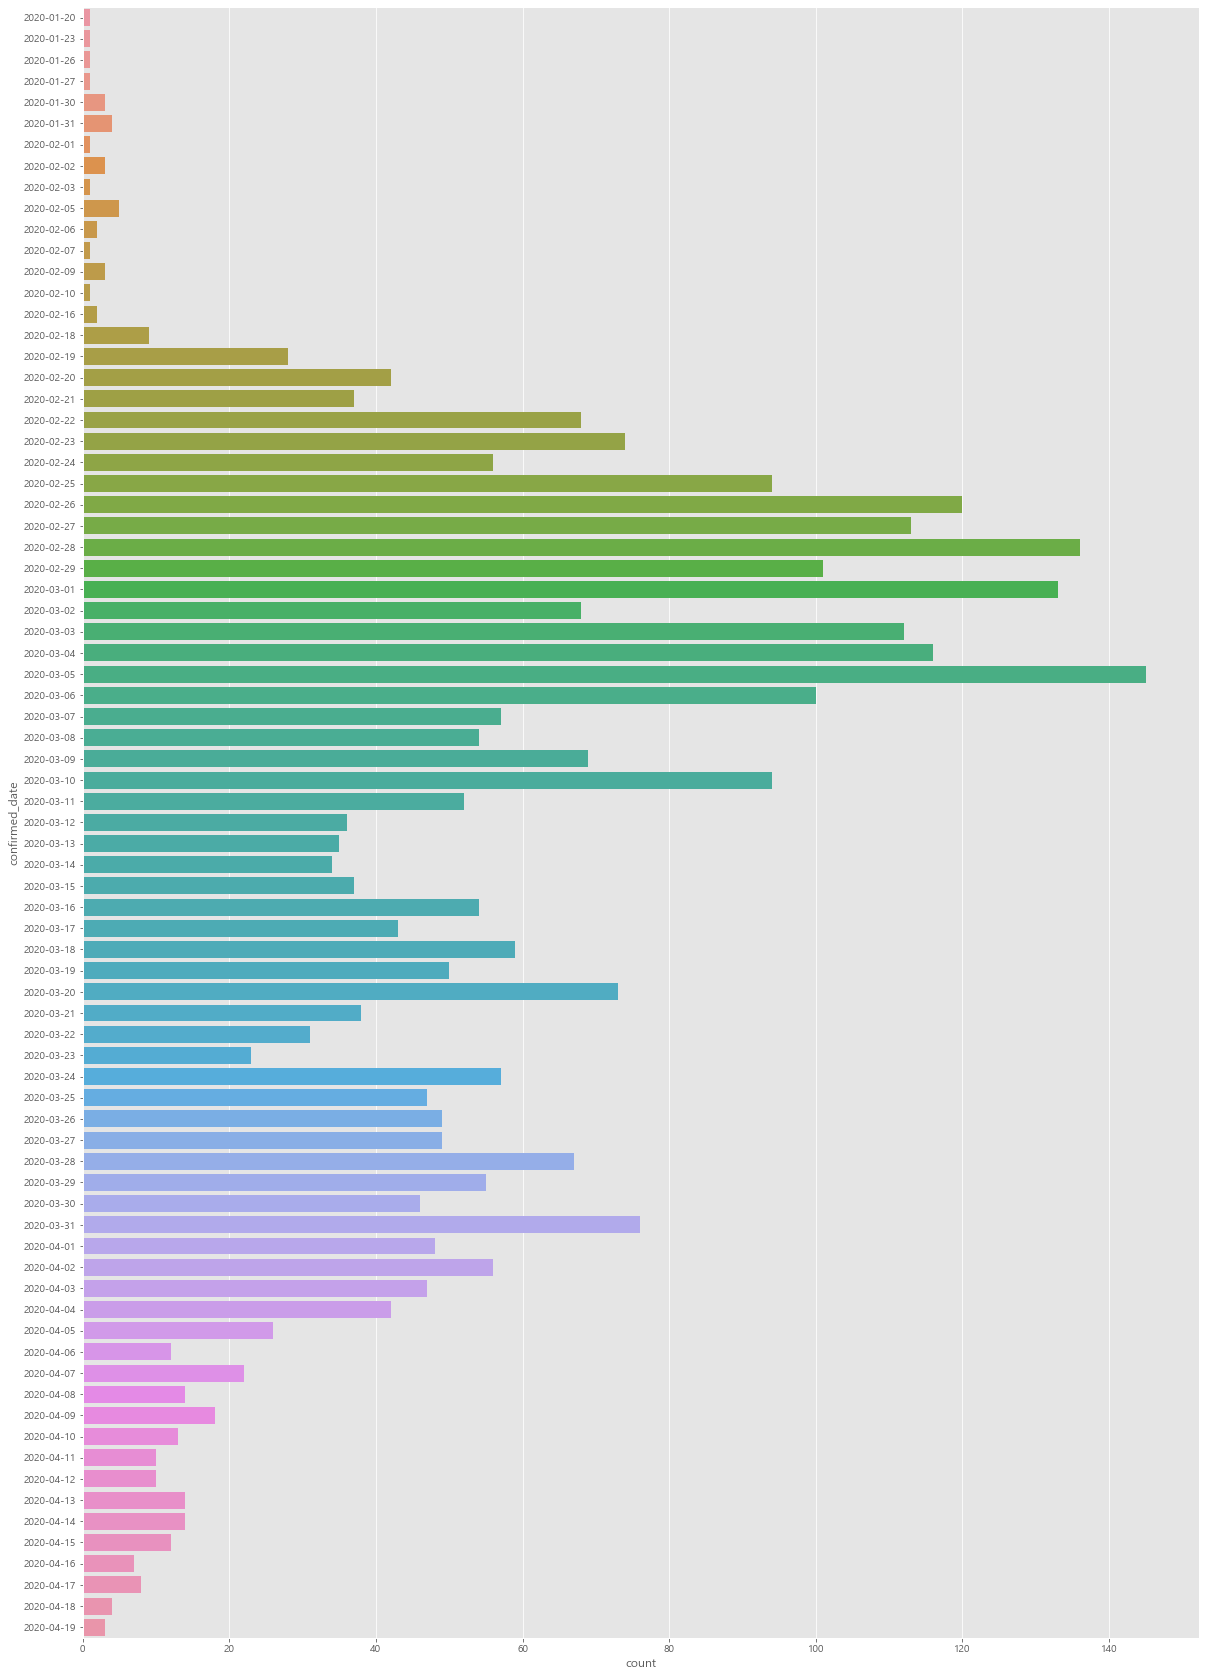

In [49]:
confirmed = df_PatientInfo.loc[:, ['confirmed_date','age']]


plt.figure(figsize = (20,30))

sns.countplot(y="confirmed_date", data=confirmed.sort_values(by=['confirmed_date'], axis=0,  ascending=True))

plt.show()


In [50]:
df_TimeAge

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
445,2020-04-20,0,40s,1412,3
446,2020-04-20,0,50s,1948,15
447,2020-04-20,0,60s,1343,34
448,2020-04-20,0,70s,705,69
